# Technical Analysis with Pandas ([pandas_ta](https://github.com/twopirllc/pandas-ta))
* Below contains examples of simple charts that can be made from pandas_ta indicators
* Examples below are nothing more than for **educational purposes only**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import pandas_ta as ta
from alphaVantageAPI.alphavantage import AlphaVantage  # pip install alphaVantage-api
e = pd.DataFrame()

### Help on Indicators (post an [issue](https://github.com/twopirllc/pandas-ta/issues) if the indicator doc needs updating)

In [2]:
e.ta.indicators()

pandas.ta - Technical Analysis Indicators
Total Indicators: 82
Abbreviations:
    accbands, ad, adosc, adx, amat, ao, aobv, apo, aroon, atr, bbands, bop, cci, cmf, cmo, coppock, cross, decreasing, dema, donchian, dpo, efi, ema, eom, fwma, hl2, hlc3, hma, ichimoku, increasing, kc, kst, kurtosis, linreg, log_return, long_run, macd, mad, massi, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, percent_return, ppo, pvi, pvol, pvt, pwma, qstick, quantile, rma, roc, rsi, short_run, skew, sma, stdev, stoch, swma, t3, tema, trend_return, trima, trix, true_range, tsi, uo, variance, vortex, vp, vwap, vwma, willr, wma, zlma, zscore


In [3]:
# Individual Indicator help
help(ta.sma)

Help on function sma in module pandas_ta.overlap:

sma(close, length=None, offset=None, **kwargs)
    Simple Moving Average (SMA)
    
    The Simple Moving Average is the classic moving average that is the equally
    weighted average over n periods.
    
    Sources:
        https://www.tradingtechnologies.com/help/x-study/technical-indicator-definitions/simple-moving-average-sma/
    
    Calculation:
        Default Inputs:
            length=10
        SMA = SUM(close, length) / length
    
    Args:
        close (pd.Series): Series of 'close's
        length (int): It's period.  Default: 10
        offset (int): How many periods to offset the result.  Default: 0
    
    Kwargs:
        adjust (bool): Default: True
        presma (bool, optional): If True, uses SMA for initial value.
        fillna (value, optional): pd.DataFrame.fillna(value)
        fill_method (value, optional): Type of fill method
    
    Returns:
        pd.Series: New feature generated.



### Load Daily SPY from [AlphaVantage](http://www.alphavantage.com) and clean it up a little

In [4]:
ticker = 'DIA'
AV = AlphaVantage(premium=False, clean=True, output_size='full')
df = AV.data(symbol=ticker, function='DA') # Daily Adjusted
df.name = ticker
df.set_index(['date'], inplace=True)
df.drop(['dividend', 'split_coefficient'], axis=1, inplace=True) if 'dividend' in df.columns and 'split_coefficient' in df.columns else None

opendf = df['open']
closedf = df['close']
volumedf = df['volume']

In [5]:
last_ = df.shape[0]
# last_ = 100 # Uncomment for remaining subset
print(f"{df.name}{df.shape}")
df.head()

DIA(5366, 6)


,open,high,low,close,adj_close,volume
date,,,,,,
1998-01-20,77.81,78.84,77.41,78.81,49.6321,1744600.0
1998-01-21,78.09,78.38,77.28,77.84,49.0212,1839600.0
1998-01-22,77.19,77.86,76.94,77.19,48.6118,1662600.0
1998-01-23,77.50,77.75,76.31,77.00,48.4922,1693700.0
1998-01-26,77.38,77.67,76.94,77.31,48.6874,1172800.0


## Create some constants for some indicators

In [6]:
#help(df.ta.constants) # for more info
df.ta.constants(True, -4, 4)
df.tail()

,open,high,low,close,adj_close,volume,-4,-3,-2,-1,0,1,2,3,4
date,,,,,,,,,,,,,,,
2019-05-10,257.58,260.54,255.04,259.92,259.92,5456134.0,-4,-3,-2,-1,0,1,2,3,4
2019-05-13,254.67,255.70,252.59,253.47,253.47,6326032.0,-4,-3,-2,-1,0,1,2,3,4
2019-05-14,254.40,257.23,254.24,255.81,255.81,4308796.0,-4,-3,-2,-1,0,1,2,3,4
2019-05-15,254.17,257.63,253.74,256.92,256.92,4151403.0,-4,-3,-2,-1,0,1,2,3,4
2019-05-16,258.00,260.08,257.85,259.16,259.16,3889186.0,-4,-3,-2,-1,0,1,2,3,4


## Price & Volume Charts with Moving Averages

In [7]:
def machart(kind, fast, medium, slow, append=True, last=last_, figsize=(16,8)):
    ma1 = df.ta(kind=kind, length=fast, append=append)
    ma2 = df.ta(kind=kind, length=medium, append=append)
    ma3 = df.ta(kind=kind, length=slow, append=append)
    pricedf = df[['close', ma1.name, ma2.name, ma3.name]]
    title = f"{df.name}: {kind.upper()}s from {df.index[0]} to {df.index[-1]} ({last})"
    pricedf = df[['close', ma1.name, ma2.name, ma3.name]]
    pricedf.tail(last).plot(figsize=figsize, color=['black', 'green', 'orange', 'red'], title=title)

def volumechart(kind, length=10, last=last_, figsize=(16, 3)):
    volume = pd.DataFrame({'V+': volumedf[closedf > opendf], 'V-': volumedf[closedf < opendf]})
    title = f"{df.name} Volume: {kind.upper()} from {df.index[0]} to {df.index[-1]} ({last})"
    volume.tail(last).plot(kind='bar', figsize=figsize, width=0.5, color=['green', 'red'], alpha=0.45, stacked=True)
    df.ta(kind=kind, close=volumedf, length=length).tail(last).plot(figsize=figsize, linewidth=1.2, color='black', title=title)

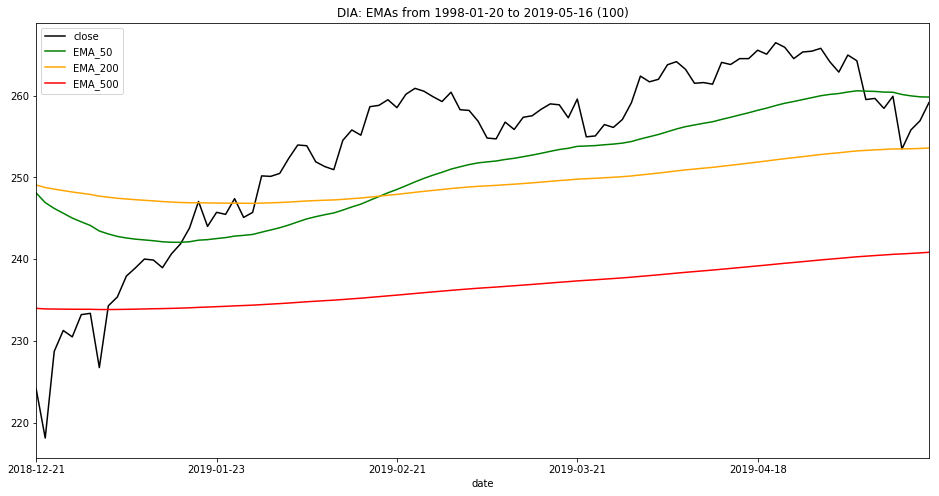

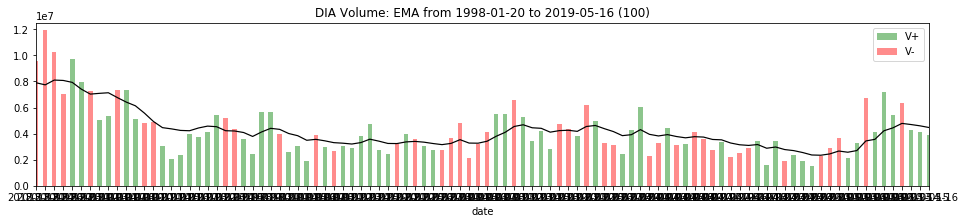

In [8]:
machart('ema', 50, 200, 500, last=100)
volumechart('ema', last=100)

## Indicator Examples
* Examples of simple and complex indicators.  Most indicators return a Series, while a few return DataFrames.
* All indicators can be called one of three ways. Either way, they return the result.

### Three ways to use pandas_ta
1. Stand Alone like TA-Lib  ta.**indicator**(*kwargs*).
2. As a DataFrame Extension like df.ta.**indicator**(*kwargs*).  Where df is a DataFrame with columns named 'open', 'high', 'low', 'close, 'volume' for simplicity.
3. Similar to #2, but by calling: df.ta(kind='**indicator**', *kwargs*).

### Cumulative Log Return

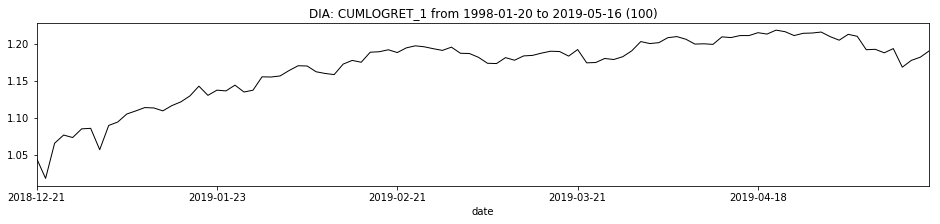

In [9]:
clr = df.ta.log_return(cumulative=True, append=True)
# df[['0', f"{clr.name}"]].tail(100).plot(figsize=(16, 3), color=['black'], linewidth=1, title=f"{df.name}: {clr.name} from {df.index[0]} to {df.index[-1]} ({last_})")
df[clr.name].tail(100).plot(figsize=(16, 3), color=['black'], linewidth=1, title=f"{df.name}: {clr.name} from {df.index[0]} to {df.index[-1]} (100)")

### MACD

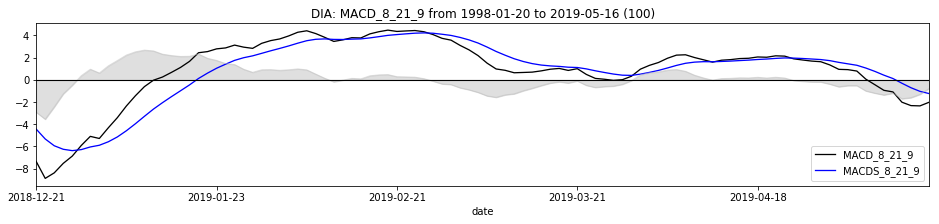

In [10]:
macddf = df.ta.macd(fast=8, slow=21, signal=9, min_periods=None, append=True)
macddf[[macddf.columns[0], macddf.columns[2]]].tail(100).plot(figsize=(16, 3), color=['black', 'blue'], linewidth=1.3)
macddf[macddf.columns[1]].tail(100).plot.area(figsize=(16, 3), stacked=False, color=['silver'], linewidth=1, title=f"{df.name}: {macddf.name} from {df.index[0]} to {df.index[-1]} (100)").axhline(y=0, color="black", lw=1.1)

### ZScore

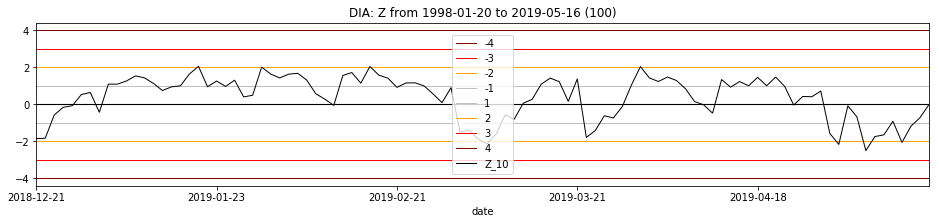

In [11]:
df.ta.zscore(length=10, append=True)
zcolors = ['maroon', 'red', 'orange', 'silver', 'silver', 'orange', 'red', 'maroon', 'black', 'blue']
zcols = df[['-4', '-3', '-2', '-1', '1', '2', '3', '4', 'Z_10']]
zcols.tail(100).plot(figsize=(16, 3), color=zcolors, linewidth=1, title=f"{df.name}: Z from {df.index[0]} to {df.index[-1]} (100)").axhline(y=0, color="black", lw=1.1)

# New Features

### Archer Moving Averages Trends
Archer Moving Average Trends (__amat__) returns the long and short run trends of fast and slow moving averages.

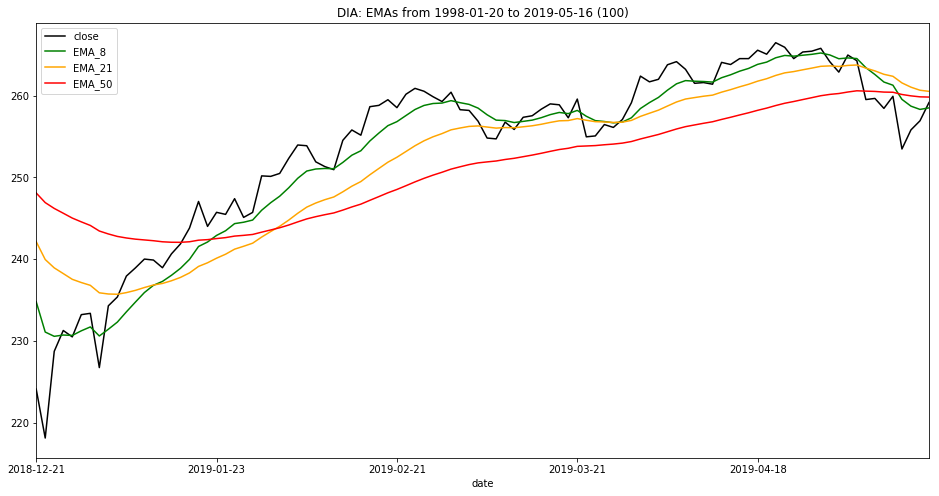

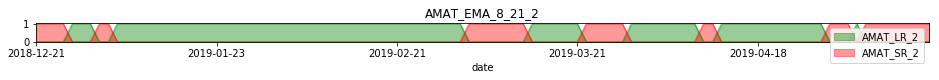

In [12]:
amat = df.ta.amat()
machart('ema', 8, 21, 50, last=100) # Price Chart so we can see the association with AMAT
amat.tail(100).plot(kind='area', figsize=(16, 0.35), color=['green', 'red'], alpha=0.4, stacked=False, title=amat.name)

### Archer On Balance Volume
Archer On Balance Volume (__aobv__) returns a DataFrame of OBV, OBV min and max, fast and slow MAs of OBV, and the long and short run trends of the two OBV MAs.

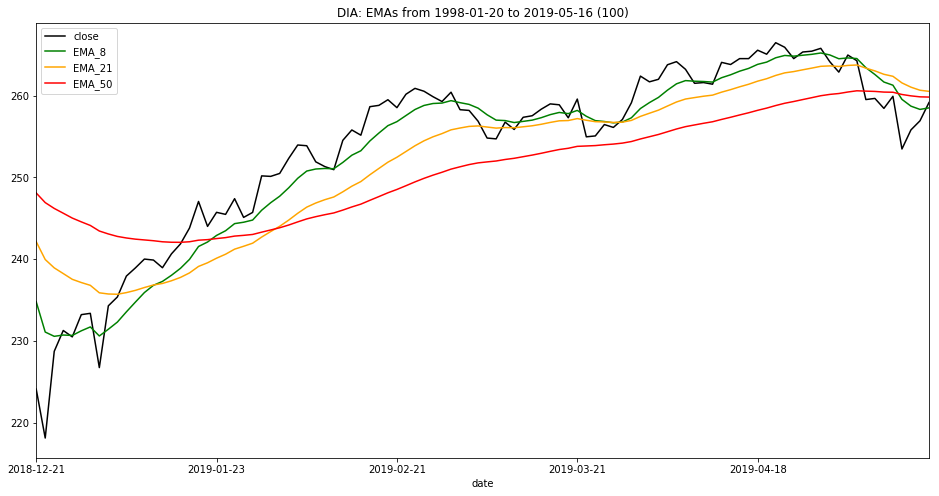

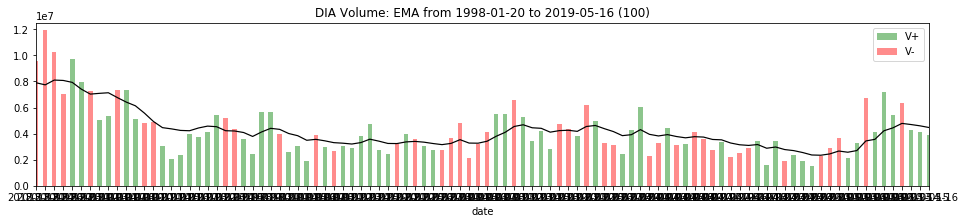

In [13]:
machart('ema', 8, 21, 50, last=100) # Price Chart so we can see the association with AOBV
volumechart('ema', last=100)

Columns[7]: OBV, OBV_min_2, OBV_max_2, OBV_EMA_8, OBV_EMA_21, AOBV_LR_2, AOBV_SR_2


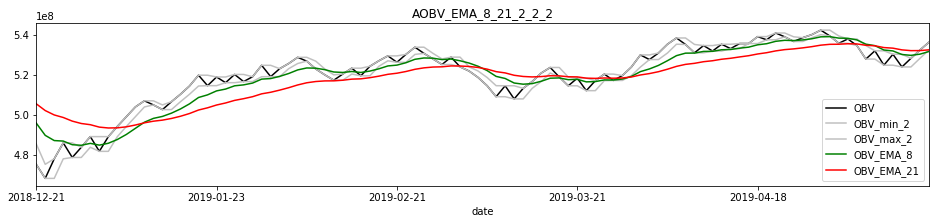

In [14]:
aobv = ta.aobv(close=closedf, volume=volumedf, mamode='ema', fast=8, slow=21)
aobv[aobv.columns[:5]].tail(100).plot(figsize=(16, 3), color=['black', 'silver', 'silver', 'green', 'red'], title=aobv.name)
print(f"Columns[{len(aobv.columns)}]: {', '.join(list(aobv.columns))}")

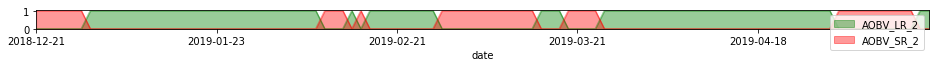

In [15]:
aobv[aobv.columns[-2:]].tail(100).plot(kind='area', figsize=(16, 0.35), color=['green', 'red'], alpha=0.4, stacked=False)

### Long Run and Short Run
Long Run (__long_run__) returns 1 if fast and slow averages approach each other from the below or both are increasing.  Otherwise returns 0.

Conversely, Short Run (__short_run__) returns 1 if fast and slow averages approach each other from above or both are decreasing.  Otherwise returns 0.

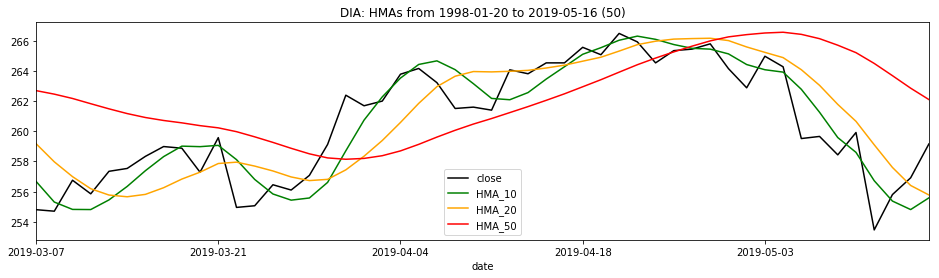

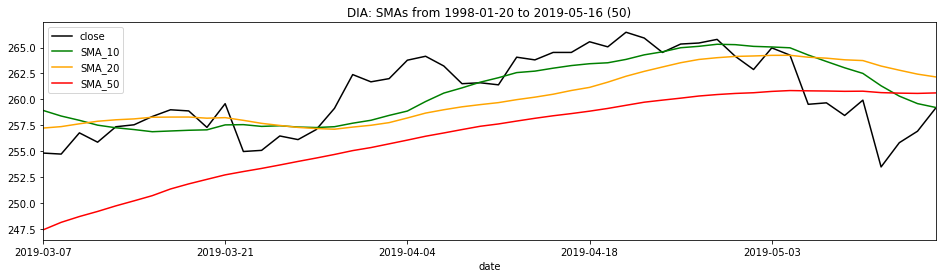

In [16]:
machart('hma', 10, 20, 50, last=50, figsize=(16,4))
machart('sma', 10, 20, 50, last=50, figsize=(16,4))

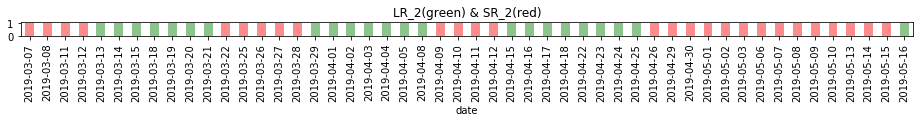

In [17]:
hma10 = df.ta.hma(length=10)  # HMA 10
sma20 = df.ta.sma(length=20)  # SMA 20
lrun = df.ta.long_run(hma10, sma20, append=False)  # Long Run of HMA 10 and SMA 10
srun = df.ta.short_run(hma10, sma20, append=False) # Short Run of HMA 10 and SMA 10
srun.tail(50).plot(kind='bar', figsize=(16,0.25), color=['red'], linewidth=1, alpha=0.45)
lrun.tail(50).plot(kind='bar', figsize=(16,0.25), color=['green'], linewidth=1, alpha=0.45, title=f"{lrun.name}(green) & {srun.name}(red)")

### Cross
Cross (__cross__) returns 1 if two series cross and 0 if they do not.  By default, above=True.

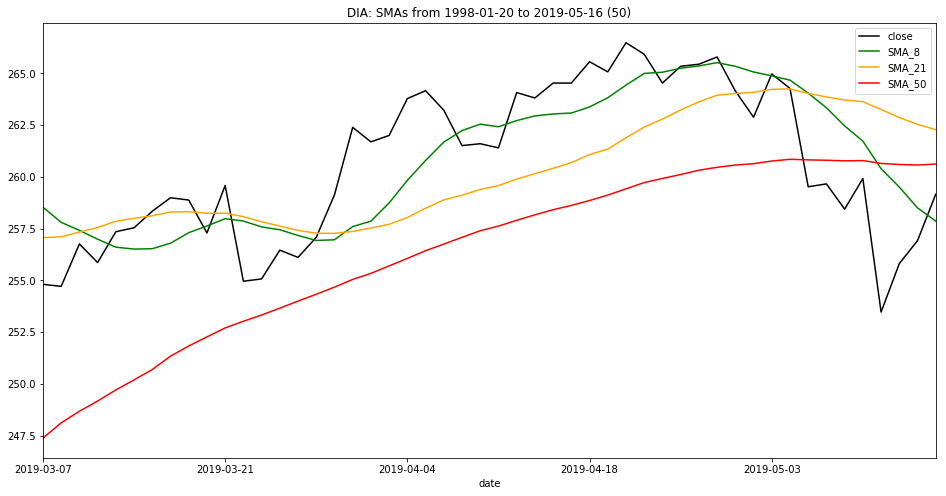

In [18]:
machart('sma', 8, 21, 50, last=50)

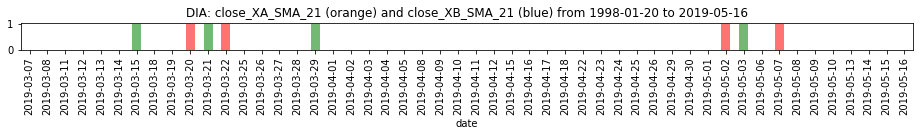

In [19]:
maf = df.ta(kind='sma', length=21)
cross_above = ta.cross(df['close'], maf, above=True)
cross_above.tail(50).plot(kind='bar', figsize=(16, 0.5), color=['green'], linewidth=1, alpha=0.55, stacked=False)

cross_below = ta.cross(df['close'], maf, above=False)
cross_below.tail(50).plot(kind='bar', figsize=(16, 0.5), color=['red'], linewidth=1, alpha=0.55, stacked=False, title=f"{df.name}: {cross_above.name} (orange) and {cross_below.name} (blue) from {df.index[0]} to {df.index[-1]}")

In [20]:
print(f"Most recent {cross_above.name} Dates:\n    {', '.join(list(cross_above[cross_above > 0].tail(6).index[::-1]))}")
print(f"Most recent {cross_below.name} Dates:\n    {', '.join(list(cross_below[cross_below > 0].tail(6).index[::-1]))}")

Most recent close_XA_SMA_21 Dates:
    2019-05-03, 2019-03-29, 2019-03-21, 2019-03-15, 2019-01-08, 2018-11-28
Most recent close_XB_SMA_21 Dates:
    2019-05-07, 2019-05-02, 2019-03-22, 2019-03-20, 2019-03-06, 2018-12-04


### Trend Return
* Trend Return (__trend_return__) calculates the cumulative log returns from a specified trend.
* There is no limit on how to construct a trend.  It can be as simple as: close > SMA(close, 50).

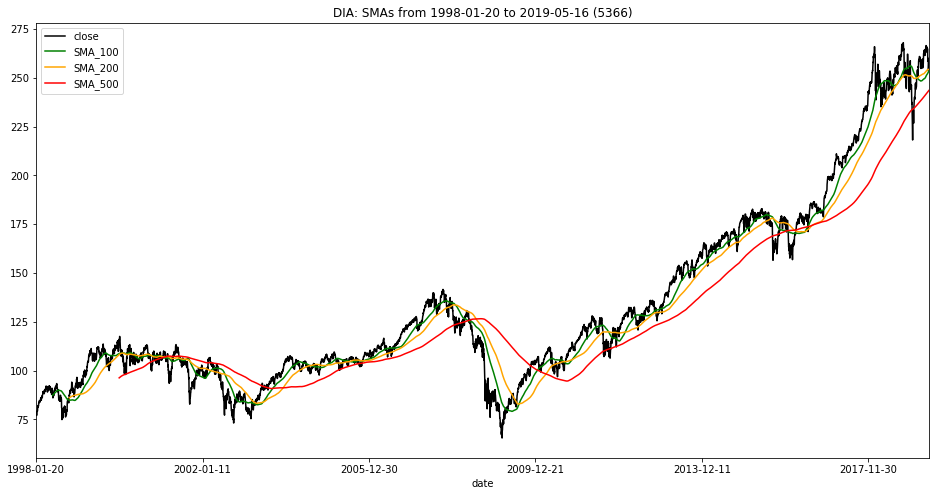

In [21]:
machart('sma', 100, 200, 500)#, last=50)

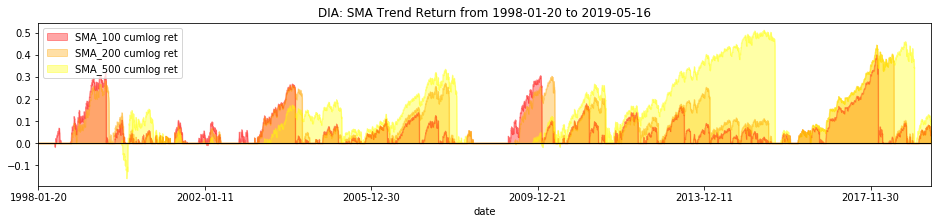

In [22]:
def ma_strategy(kind, fast, medium, slow, cumulative=True, last=last_):
    """A very basic analysis of the closing price being greater than each moving average"""
    last = last if last is not None else df.shape[0]
    closedf = df['close']
    maf = df.ta(kind=kind, length=fast)
    mam = df.ta(kind=kind, length=medium)
    mas = df.ta(kind=kind, length=slow)
    tdf = pd.DataFrame({
        f"{maf.name} cumlog ret": ta.trend_return(closedf, closedf > maf, cumulative=cumulative),
        f"{mam.name} cumlog ret": ta.trend_return(closedf, closedf > mam, cumulative=cumulative),
        f"{mas.name} cumlog ret": ta.trend_return(closedf, closedf > mas, cumulative=cumulative),
    })
    tdf.set_index(closedf.index, inplace=True)
    window = tdf.tail(last)
    title = f"{df.name}: {kind.upper()} Trend Return from {window.index[0]} to {window.index[-1]}"
    window.plot.area(figsize=(16, 3), color=['red', 'orange', 'yellow'], linewidth=1, alpha=0.35, title=title, stacked=False).axhline(y=0, color="black", lw=1.1)

ma_strategy('sma', 100, 200, 500)#, last=50)

# Disclaimer
* All investments involve risk, and the past performance of a security, industry, sector, market, financial product, trading strategy, or individual’s trading does not guarantee future results or returns. Investors are fully responsible for any investment decisions they make. Such decisions should be based solely on an evaluation of their financial circumstances, investment objectives, risk tolerance, and liquidity needs.

* Any opinions, news, research, analyses, prices, or other information offered is provided as general market commentary, and does not constitute investment advice. I will not accept liability for any loss or damage, including without limitation any loss of profit, which may arise directly or indirectly from use of or reliance on such information.